In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Задача 1

In [2]:
def Fast_Descent(M, f, eps):
    x = np.random.random(M.shape[0])
    step = 0
    while np.linalg.norm(M@x - f) > eps:
        r = M@x - f
        tau = np.dot(r,r) / np.dot(M@r,r)
        x = x - tau*r
        
        if np.linalg.norm(x) > 1e4 or step > 1e5:
            return x, -10
        
        step += 1
    return x, step

In [3]:
M = np.fromfunction(lambda i, j: 1/(i+j+1), (4, 4))
f = np.sum(M, axis=1)

ans, step = Fast_Descent(M, f, 1e-10)
print("ans = ", ans)
print("step = ", step)

ans =  [0.99999997 1.00000031 0.99999925 1.00000049]
step =  43707


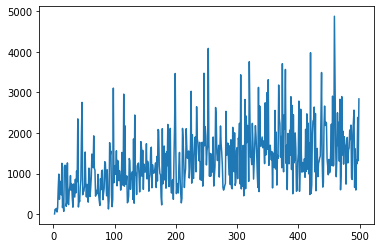

In [4]:
results = []
N = 500
for i in range(2, N):
    A = np.fromfunction(lambda k, j: 1/(k+j+1), (i, i))
    f = np.sum(A, axis=1)
    x, iters = Fast_Descent(A, f, 1e-4)
    results.append(iters)
plt.plot(np.array(range(2, N)), results)
plt.show()

0.45297482267685835 4.628427713790982


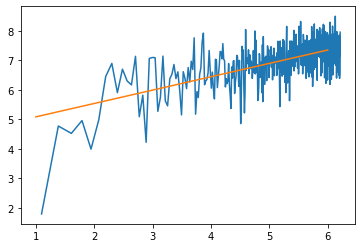

In [5]:
plt.plot(np.log1p(np.array(range(2, N))), np.log1p(np.array(results)))

coefs = np.polyfit(np.log1p(np.array(range(2, N))),np.log1p(np.array(results)),1)
plt.plot(np.arange(6)+1,coefs[0]*(np.arange(6)+1)+coefs[1])
print(coefs[0],coefs[1])
plt.show()

Можно сделать вывод, что метод сходится пропорционально корню n. Но лучше считать на чуть лучшем компьютере, чем мой :)

## Задача 2

In [6]:
def Step(x_b, r_b, s_b):
        alpha = (r_b @ r_b) / (M @ s_b @ s_b)
        x = x_b - alpha * s_b
        r = r_b - alpha * M @ s_b

        beta = (r @ r) / (r_b @ r_b)
        s   = r  + beta * s_b

        return x, r, s
    
def Conj_Grad(M, f, eps):

    x  = np.random.random(n)
    s  = M @ x - f
    r  = s 
    step = 1
    while np.linalg.norm(M @ x - f) > eps:
        if step > 1e5 or np.linalg.norm(x) > 1e5:
            return x, -10
        step += 1
        x, r, s = Step(x, r, s)
    return x, step

In [7]:
n = 4

M = np.fromfunction(lambda i, j: 1/(i+j+1), (n, n))
f = np.sum(M, axis=1)

ans, step = Conj_Grad(M, f, 1e-10)
print("ans = ", ans)
print("step = ", step)

ans =  [1. 1. 1. 1.]
step =  6


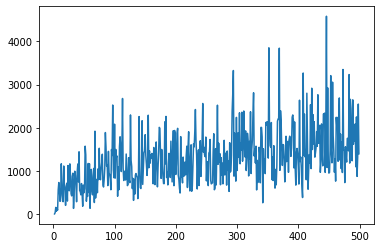

In [8]:
results = []
N = 500
for i in range(2, N):
    A = np.fromfunction(lambda k, j: 1/(k+j+1), (i, i))
    f = np.sum(A, axis=1)
    x, iters = Fast_Descent(A, f, 1e-4)
    results.append(iters)
plt.plot(np.array(range(2, N)), results)
plt.show()

0.43766408914753097 4.724153948675757


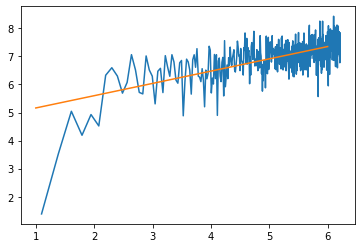

In [9]:
plt.plot(np.log1p(np.array(range(2, N))), np.log1p(np.array(results)))

coefs = np.polyfit(np.log1p(np.array(range(2, N))),np.log1p(np.array(results)),1)
plt.plot(np.arange(6)+1,coefs[0]*(np.arange(6)+1)+coefs[1])
print(coefs[0],coefs[1])
plt.show()

## Выводы:
Можно сказать, что асимптотики обоих методов - $O(\sqrt N)$, однако константа асимптотики метода сопряженных градиентов сильно меньше, чем у итерационного метода (свободные коэффициенты логарифмического масштаба отличаются примерно на 10\%)

## Задача 3

Немного измененная реализация

In [10]:
def Fast_Descent_r(M, f, eps):
    x = np.random.random(M.shape[0])
    
    rs = []
    step = 0
    while np.linalg.norm(M@x - f) > eps:
        r = M@x - f
        rs.append(np.linalg.norm(r))
        tau = np.dot(r,r) / np.dot(M@r,r)
        x = x - tau*r
        
        if np.linalg.norm(x) > 1e4 or step > 1e5:
            return x, -10
        
        step += 1
    return x, step, rs

def Conj_Grad_r(M, f, eps):
    
    x  = np.random.random(n)
    s  = M @ x - f
    r = s
    rs = [np.linalg.norm(r)]
    step = 1
    while np.linalg.norm(M @ x - f) > eps:
        if step > 1e5 or np.linalg.norm(x) > 1e5:
            return x, -10, rs
        step += 1
        x, r, s = Step(x, r, s)
        rs.append(np.linalg.norm(r))
    return x, step, rs


Малая размерность

2.248188614273718e-06 10
0.0 3


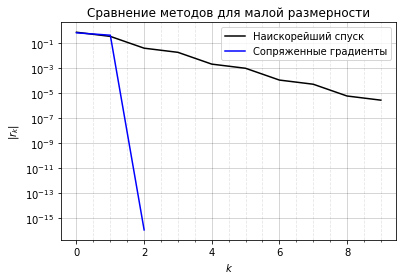

In [11]:
n = 2;

M = np.random.random((n,n))
M = M.T @ M
f = np.random.random(n)

true_ans = np.linalg.solve(M, f)

ans, step, rs1 = Fast_Descent_r(M, f, 1e-6)
print(np.linalg.norm(ans-true_ans), step)

ans, step, rs2 = Conj_Grad_r(M, f, 1e-6)
print(np.linalg.norm(ans-true_ans), step)

x = np.array(np.arange(len(rs1)))
y = rs1
x2 = np.array(np.arange(len(rs2)))
y2 = rs2

fig, ax = plt.subplots()
plt.title("Сравнение методов для малой размерности")
plt.plot(x, y, color="k",label="Наискорейший спуск")
plt.plot(x2, y2, color="b",label="Сопряженные градиенты")
plt.legend()
ax.minorticks_on()
ax.grid(b=True, which='major', color='k', linestyle='-', alpha=0.2)
ax.grid(b=True, which='minor', color='k', linestyle='--', alpha=0.1)
ax.set_yscale("log")
plt.xlabel("$k$")
plt.ylabel("$\\|r_k\\|$")
plt.show()

Большая размерность

0.0005017402822165179 74272
5.932951769357646e-10 10


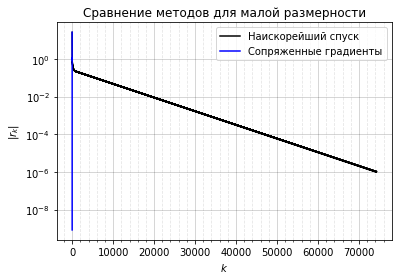

In [14]:
n = 8;

M = np.random.random((n,n))
M = M.T @ M
f = np.random.random(n)

true_ans = np.linalg.solve(M, f)

ans, step, rs1 = Fast_Descent_r(M, f, 1e-6)
print(np.linalg.norm(ans-true_ans), step)

ans, step, rs2 = Conj_Grad_r(M, f, 1e-6)
print(np.linalg.norm(ans-true_ans), step)

x = np.array(np.arange(len(rs1)))
y = rs1
x2 = np.array(np.arange(len(rs2)))
y2 = rs2

fig, ax = plt.subplots()
plt.title("Сравнение методов для малой размерности")
plt.plot(x, y, color="k",label="Наискорейший спуск")
plt.plot(x2, y2, color="b",label="Сопряженные градиенты")
plt.legend()
ax.minorticks_on()
ax.grid(b=True, which='major', color='k', linestyle='-', alpha=0.2)
ax.grid(b=True, which='minor', color='k', linestyle='--', alpha=0.1)
ax.set_yscale("log")
plt.xlabel("$k$")
plt.ylabel("$\\|r_k\\|$")
plt.show()

## Задача 4

Метод сопряженных градиентов сходится ощутимо быстрее. Более того в $n$-мерии он по идее сходится за $O(n)$ шагов, что и наблюдаем на второй картинке, откуда делаем вывод, что там метод сопряженных градиентов.
Также на первой картинке дижение происходит нормально линиям уровня, а значит там скорее метод наискорейшего спуска.
Замкнутые линии изображают линии уровня, градиент им нормален. Для функции, вида
$$
F(x)=\frac{1}{2}\langle A x \mid x\rangle-\langle b \mid x\rangle
$$
где $A^{\mathrm{T}}=A, \operatorname{dim} A=n$ и $A>0$, метод сопряженных коэффициентов сходится не более, чем за $n$ шагов.

Делая $n$ шагов нормальных предыдущим, сохраняя для квадратичной функции нормальность ко всем предыдущим направлениям на необходимое (в силу унимодальности квадратичной функции), мы гарантировано окажемся в оптимуме.
Таким образом метод сопряженных градиентов сходится не более, чем за $n$ шагов.

## Задача 5

Овражный характер функции не связан напрямую с величиной минимального спектрального числа соответствующей матрицы, а связан с ее числом обусловленности, которое как раз и задает отношение "масшатабов" оврага. Чем больше число обусловленности, тем более овражная функция.
Что касается покоординатного спуска в овражном случае, из рисунка можно сделать вывод, что скорость его сходимости сильно зависит от начального приближения.

## Задача 6

Пусть, $e_i$ - базис из собственных вектров А: \begin{cases}Ae_i=\lambda_i e_i\\v=\sum\alpha_ie_i\\v_p=\sum\alpha_i\lambda_i^pe_i\end{cases}  Если $v_p$-базис, то из $\sum\beta_pv_p=0$, следует равенство нулю всех коэффициентов $\beta_p$. Тогда базисность $v_p$ определяется неравенством нулю следующего определителя: $$\begin{vmatrix}\alpha_{1} & \alpha_{1} \lambda_{1} & \alpha_{1} \lambda_{1}^{2} & \ldots & \alpha_{1} \lambda_{1}^{n-1} \\ \alpha_{2} & \alpha_{2} \lambda_{2} & \alpha_{2} \lambda_{2}^{2} & \ldots & \alpha_{2} \lambda^{n-1}_{2}\\ \dots&\dots&\dots&\dots&\dots\\\alpha_{n} & \alpha_{n} \lambda_{n} & \alpha_{n} \lambda_{n}^{2} & \ldots & \alpha_{n} \lambda_{n}^{n-1}\end{vmatrix}=\alpha_1\cdot\alpha_2\cdot\dots\cdot\alpha_n\begin{vmatrix}1 &\lambda_{1} &  \lambda_{1}^{2} & \ldots &  \lambda_{1}^{n-1} \\ 1 &  \lambda_{2} &  \lambda_{2}^{2} & \ldots &  \lambda^{n-1}_{2}\\ \dots&\dots&\dots&\dots&\dots\\1 &  \lambda_{n} &  \lambda_{n}^{2} & \ldots &  \lambda_{n}^{n-1}\end{vmatrix}=\prod_{l=1}^n\alpha_l\cdot\prod_{1\leqslant i<j\leqslant n}\left(\lambda_i-\lambda_j\right)$$ Последнее равенство верно т. к. выражение есть определитель Ван-дер Монда. Очевидно, что он не равен 0. Таким образом, для того, чтобы данная система была базисом, необходимо, чтобы $v$ имел ненулевые проекции на собственные подпространства.\\ Допустим, собственные значения совпадают, но не равны нулю. В базисе из собственных векторов возьмем наибольшее количество неодинаковых собственных значений - m. Сужение на подпространство такой размерности дает линейную независимость векторов, соответствующих этим собственным числам. Тогда, суммируя всё вышесказанное, получаем: $A^pv$ - линейно зависит от $v,\dots,A^{p-1}v$ $$A^pv=\sum_{i=0}^{p-1}\beta_iA^iv$$ ,тогда $A^{p+1}v=A(A^pv)$-очевидно, выражается через эту же систему, так как операции линейны. Тогда, получается, что m - есть размерность подпространства Крылова. 